# Predicting Student Admissions with Neural Networks in Keras
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [148]:
pwd

'C:\\Users\\dell\\Desktop\\Deep Learning\\Week_3\\Keras_Student_Admission\\jupyterwork'

# Task 1
## Loading the data
Read the data file named: "student_data.csv"


In [106]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv("student_data.csv")

# Printing out the first 10 rows of our data
data[:10]
#data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [108]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

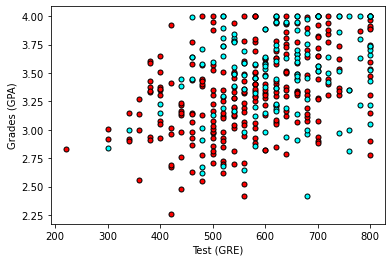

In [109]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
# The below is doing for LIST COMPREHENSION indtead of doing with loop as showing in below graph The same graph is with for loop 
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

<AxesSubplot:xlabel='gre', ylabel='gpa'>

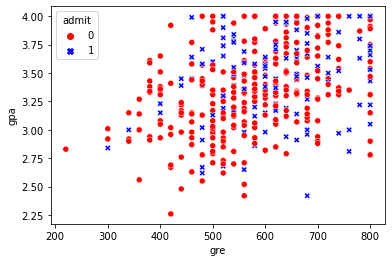

In [110]:
# Or we can plot above graph through seaborn instead of matplotlib
import seaborn as sns
sns.scatterplot(data=data , x='gre',y='gpa',hue='admit', palette=['red','blue'] , style='admit' )

In [74]:
#  Expalining argwhere for our understanding not to be used here as separately
#Jahan 1 ho ga wahan true ho jaey ga aur jahan 0 ho ga wahan false aa jaey ga

X = np.array(data[["gre","gpa"]])   # predictors
y = np.array(data[["admit"]])         # Labels
np.argwhere(y==1)

# Jahan 1 ho ga wahan true ho jaey ga aur jahan 0 ho ga wahan false aa jaey ga

array([[  1,   0],
       [  2,   0],
       [  3,   0],
       [  5,   0],
       [  6,   0],
       [  8,   0],
       [ 12,   0],
       [ 14,   0],
       [ 19,   0],
       [ 21,   0],
       [ 24,   0],
       [ 25,   0],
       [ 26,   0],
       [ 27,   0],
       [ 28,   0],
       [ 33,   0],
       [ 38,   0],
       [ 39,   0],
       [ 41,   0],
       [ 42,   0],
       [ 45,   0],
       [ 46,   0],
       [ 53,   0],
       [ 55,   0],
       [ 60,   0],
       [ 63,   0],
       [ 77,   0],
       [ 79,   0],
       [ 84,   0],
       [ 89,   0],
       [ 91,   0],
       [ 94,   0],
       [104,   0],
       [105,   0],
       [106,   0],
       [116,   0],
       [118,   0],
       [120,   0],
       [121,   0],
       [126,   0],
       [130,   0],
       [139,   0],
       [141,   0],
       [148,   0],
       [150,   0],
       [152,   0],
       [155,   0],
       [157,   0],
       [162,   0],
       [173,   0],
       [175,   0],
       [177,   0],
       [183,

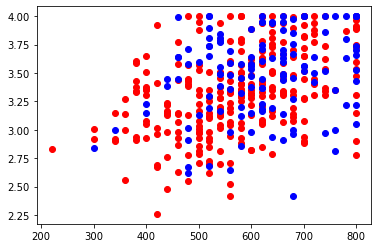

In [111]:
X = np.array(data[["gre","gpa"]])   # predictors
y = np.array(data["admit"])         # Labels
admitted = X[np.argwhere(y==1)]    # X[getting indexes where admit=1]
rejected = X[np.argwhere(y==0)]    # X[getting indexes where admit=0]
import matplotlib.pyplot as plt

for s in rejected:
    plt.scatter(s[0][0],s[0][1] , c='red')

for s in admitted:   
     plt.scatter(s[0][0],s[0][1] , c='blue')

In [54]:
# rejected
# just for viewing rejected cases

rejected[0][0]

# rejected[0][0][0] only showing first number 380.0

380.0

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

We can check `data['rank'].value_counts()` and can check values and their counts. also can check their unique values `data['rank'].unique()`

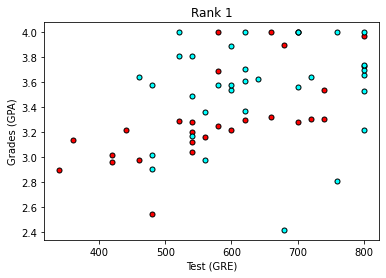

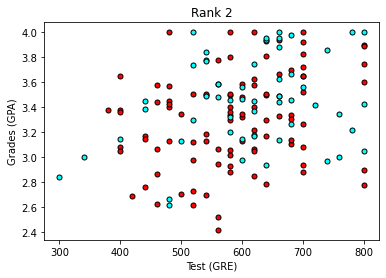

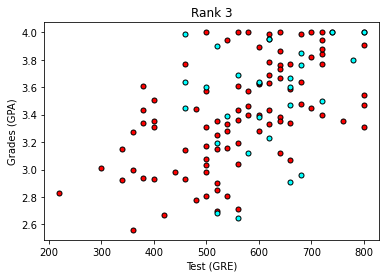

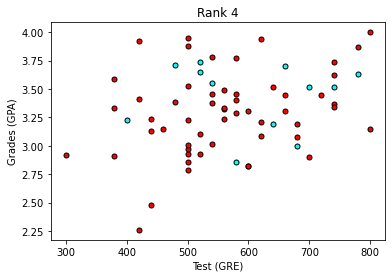

In [112]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.
 
It seems there exist a certain correlation with all these 3 variables. We can also check by measuring correlation `data.corr()`
## Task-2
## One-hot encoding the rank
For this, please use the `get_dummies` function in pandas in order to one-hot and encode the data.

In [113]:
from sklearn.preprocessing import OneHotEncoder

# Make dummy variables for rank
one_hot_data = pd.get_dummies(data , columns=['rank'])

# Drop the previous rank column
#one_hot_data = None

# Print the first 10 rows of our data
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [114]:
one_hot_data.columns

Index(['admit', 'gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [115]:
one_hot_data.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank_1,400.0,0.1525,0.359955,0.00,0.00,0.000,0.00,1.0
rank_2,400.0,0.3775,0.485369,0.00,0.00,0.000,1.00,1.0
rank_3,400.0,0.3025,0.459916,0.00,0.00,0.000,1.00,1.0
rank_4,400.0,0.1675,0.373889,0.00,0.00,0.000,0.00,1.0


## Task 3
## Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

Or you can also use `Min Max Scaler`

In [ ]:
# Copying our data
      #processed_data = one_hot_data[:]

# Scaling the columns
    # processed_data['gre'] = None
     #processed_data['gpa'] = None
    #processed_data[:10]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

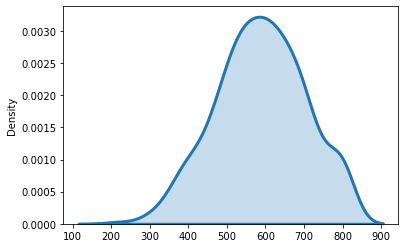

In [116]:
import seaborn as sns
sns.distplot(one_hot_data[['gre']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

# sns.distplot(one_hot_data[['gpa']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

# sns.distplot(one_hot_data[['rank_1']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
# sns.distplot(one_hot_data[['rank_2']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
# sns.distplot(one_hot_data[['rank_3']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
# sns.distplot(one_hot_data[['rank_4']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

# Here by drawing different plots we are getting the idea of how we want to do scaling 

In [92]:
processed_data = one_hot_data[:]
processed_data

# To scale the columns 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

new = scaler.fit_transform(processed_data)
col_names = ["gre",""]
col_names = ["admit", "gre", "gpa", "rank_1", "rank_2", "rank_3", "rank_4"]

processed_data=pd.DataFrame(columns=col_names , data=new)

processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0.0,0.275862,0.775862,0.0,0.0,1.0,0.0
1,1.0,0.758621,0.810345,0.0,0.0,1.0,0.0
2,1.0,1.000000,1.000000,1.0,0.0,0.0,0.0
3,1.0,0.724138,0.534483,0.0,0.0,0.0,1.0
4,0.0,0.517241,0.385057,0.0,0.0,0.0,1.0
5,1.0,0.931034,0.425287,0.0,1.0,0.0,0.0
6,1.0,0.586207,0.413793,1.0,0.0,0.0,0.0
7,0.0,0.310345,0.471264,0.0,1.0,0.0,0.0
8,1.0,0.551724,0.649425,0.0,0.0,1.0,0.0
9,0.0,0.827586,0.954023,0.0,1.0,0.0,0.0


In [117]:
processed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.0,0.000000,0.000000,1.000000,1.0
gre,400.0,0.633966,0.199166,0.0,0.517241,0.620690,0.758621,1.0
gpa,400.0,0.649368,0.218717,0.0,0.500000,0.652299,0.810345,1.0
rank_1,400.0,0.152500,0.359955,0.0,0.000000,0.000000,0.000000,1.0
rank_2,400.0,0.377500,0.485369,0.0,0.000000,0.000000,1.000000,1.0
rank_3,400.0,0.302500,0.459916,0.0,0.000000,0.000000,1.000000,1.0
rank_4,400.0,0.167500,0.373889,0.0,0.000000,0.000000,0.000000,1.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:ylabel='Density'>

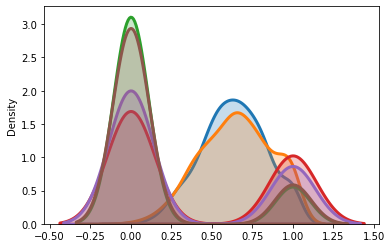

In [118]:
# Now again seeing the data distribution of our scaled data 

import seaborn as sns
sns.distplot(processed_data[['gre']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

sns.distplot(processed_data[['gpa']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

sns.distplot(processed_data[['rank_1']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
sns.distplot(processed_data[['rank_2']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
sns.distplot(processed_data[['rank_3']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})
sns.distplot(processed_data[['rank_4']] , hist=False , kde=True , kde_kws = {'shade':True , 'linewidth':3})

## Task 4
## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [119]:
processed_data.index

RangeIndex(start=0, stop=400, step=1)

In [120]:
len(processed_data)*0.8

320.0

In [121]:
sample = None
sample = np.random.choice(processed_data.index , size = int(len(processed_data)*0.8) )
train_data, test_data = processed_data.iloc[sample] ,processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 320
Number of testing samples is 182
     admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
70     0.0  0.724138  1.000000     0.0     0.0     1.0     0.0
308    0.0  0.551724  0.500000     0.0     1.0     0.0     0.0
127    0.0  0.896552  0.850575     0.0     0.0     0.0     1.0
149    0.0  0.896552  0.603448     1.0     0.0     0.0     0.0
297    0.0  0.413793  0.465517     0.0     1.0     0.0     0.0
32     0.0  0.655172  0.655172     0.0     0.0     1.0     0.0
14     1.0  0.827586  1.000000     1.0     0.0     0.0     0.0
148    1.0  0.448276  0.373563     1.0     0.0     0.0     0.0
334    1.0  0.413793  0.793103     0.0     0.0     1.0     0.0
193    0.0  0.275862  0.764368     0.0     0.0     0.0     1.0
    admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
5     1.0  0.931034  0.425287     0.0     1.0     0.0     0.0
7     0.0  0.310345  0.471264     0.0     1.0     0.0     0.0
15    0.0  0.448276  0.678161     0.0     0.0     1.0 

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

Also, in Keras, we need to one-hot encode the output. We'll do this with the `to_categorical function`.

In [122]:
import keras

features = train_data.drop('admit' ,axis=1) # X
targets = train_data['admit']  # y


features_test = test_data.drop('admit' ,axis=1) # X
targets_test = test_data['admit']  # y

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
#xtrain = np.array(train_data.drop('admit', axis=1))
#ytrain = np.array(keras.utils.to_categorical(train_data['admit'], 2))
#xtest = np.array(test_data.drop('admit', axis=1))
#ytest = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:10])
print(targets[:10])




          gre       gpa  rank_1  rank_2  rank_3  rank_4
70   0.724138  1.000000     0.0     0.0     1.0     0.0
308  0.551724  0.500000     0.0     1.0     0.0     0.0
127  0.896552  0.850575     0.0     0.0     0.0     1.0
149  0.896552  0.603448     1.0     0.0     0.0     0.0
297  0.413793  0.465517     0.0     1.0     0.0     0.0
32   0.655172  0.655172     0.0     0.0     1.0     0.0
14   0.827586  1.000000     1.0     0.0     0.0     0.0
148  0.448276  0.373563     1.0     0.0     0.0     0.0
334  0.413793  0.793103     0.0     0.0     1.0     0.0
193  0.275862  0.764368     0.0     0.0     0.0     1.0
70     0.0
308    0.0
127    0.0
149    0.0
297    0.0
32     0.0
14     1.0
148    1.0
334    1.0
193    0.0
Name: admit, dtype: float64


### Training the 2nd Layer Neural Network 

The following function trains the 2-Layer Neural Network. First we will write some helper functions. 

In [138]:
 # Activation Sigmoid Function 

def sigmoid(x):
    return 1/(1 +np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))


def error_formula(y, output):     # Cross Entropy 
    return -y*np.log(output) - (1-y)*np.log(1-output)

### Backpropagate the Error
Writing the error term giving by the following equation


    -(y - yhat)sigma_prime(x)

In [134]:
def error_term_formula(y, output):  # Here we are multiplying sigmoid's derivative 
    
    # for penalizing edge values of curve -->  output x 1-output
    return -(y - output)* output * (1-output)

In [139]:
# Neural Network Hyperparameters

epochs = 2500  # here we have kept static values of epochs (in later stages we will see how to learn them)
learnrate = 1.0

# Training Function 
def train_nn(features ,targets , epochs , learnrate ):   # here we are making our function 
    # use to same seed to make debugging easier 
    np.random.seed(42)
    n_records , n_features =features.shape
    
    last_loss = None
    
    # Initialize weights 
    
    weights =  np.random.normal(scale=1 / n_features**.5 , size = n_features)
    
    for e in range (epochs):
        del_w = np.zeros(weights.shape)
        for x , y in zip(features.values, targets):
            
            # Loop through all records , x is the input , y is the target
            
            # Activation of the output unit
            # Notice we multiplt the inputs  and the weights  here
            # rather than storing h as a separate variable 
            
            output = sigmoid(np.dot(x, weights))
            
            # The error , the target minus the network output
            
            error = error_formula(y , output)
            
            # The error term 
            # Notice that, we calculate f'(h) here instead of defining a separate 
            # sigmoid_prime function .  This just makes it faster because we can
            # re-use the result of the sigmoid function stored in the output 
            # variable 
            
            error_term = error_term_formula(y , output)
            
            # The gradient descent step , the error times the gradient times the inputs
            
            
            del_w += error_term * x
            
            # updates the weights here , The learning rate times the change
            # in weights divided by the number of records to average 
            
            weights = weights - learnrate * del_w / n_records   # we normalize this by dividing total no. of records
            
            # so taht we average this by taking its mean
            # printing out the mean square error on the training set
            
            if e % (epochs / 10) == 0 :
                out = sigmoid(np.dot(features , weights))
                loss = np.mean((out - targets )** 2)
                
                print("Epoch : ", e)
                
                if last_loss and last_loss < loss :
                    print("Train loss " , loss , " WARNING - Loss Increasing")   
                else:
                    print("Train loss " , loss)
                    
                last_loss = loss   
            
                print("========")
                
                print("Finished Training !")
                
                return weights 
            
weights = train_nn(features , targets , epochs , learnrate)
            
            

Epoch :  0
Train loss  0.2889300165939477
Finished Training !


## Calculating the Accuracy on Test Data 

In [144]:
weights 

array([ 0.20250057, -0.05683577,  0.26441774,  0.62177434, -0.09598232,
       -0.09558601])

In [145]:
test_out = sigmoid(np.dot(features_test , weights))
predictions = test_out > 0.5
predictions

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,

In [147]:
# calculate the accuracy on test data 

test_out = sigmoid(np.dot(features_test , weights))
predictions = test_out >= 0.5

accuracy = np.mean(predictions == targets_test)
print("prediction accuracy: {: .3f} " .format(accuracy) )


prediction accuracy:  0.560 


## Task 5
## Defining the model architecture
Here's where we use Keras to build our neural network.

1. Make a sequential model with 128 nodes on first layer with an activation function of `relu`. 
2. Add a `Dropout` layer with 0.2
3. Add a `Dense` layer with 64 nodes along with `relu` as activation function.
4. Add a `Dropout` layer with 0.1
5. Add a `Dense` layer with 2 nodes with a activation function of softmax.
6. Compile the model with `binary_crossentropy`, optimzer as `adam` and metrics as `accuracy`.

In [1]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
## Add layers here

# Compiling the model


Using TensorFlow backend.


In [ ]:
from tensorflow.keras import regularizers
model.add(Dense(8, activation='sigmoid', input_dim=X.shape[1],))

## Training the model
Train the model by using `fit` function giving inputs as `xtrain`, `ytrain`, `epochs = 200`, `batch_size = 100` and `verbose = 0`

In [ ]:
# Training the model


## Scoring the model

Evaluate the model by using `model.evaluate` function on
1. Training Set by giving `xtrain` and `ytrain`
2. Testing Set by giving `xtest` and `ytest`

In [ ]:
# Evaluating the model on the training and testing set
train_score = None
print("\n Training Accuracy:", train_score[1])
test_score = None
print("\n Testing Accuracy:", test_score[1])

## Challenge: Play with the parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.
It's your turn to play with parameters! Can you improve the accuracy? The following are other suggestions for these parameters. We'll learn the definitions later in the class:
- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada